In [14]:
import radiant as rad
import numpy as np
import matplotlib.pyplot as plt


plt.rcParams['axes.labelsize'] = 'x-large'
plt.rcParams['axes.titlesize'] = 'x-large'
plt.rcParams['xtick.labelsize'] = 'large'
plt.rcParams['ytick.labelsize'] = 'large'

# Problem Parameters
a = 0.
b = 1.


def exact(*x):
    return np.prod(np.sin(np.asarray(x) * 2 * np.pi / (b - a)), axis=0)


def f(*x):
    return (len(x) * (2 * np.pi / (b - a)) ** 2) * exact(*x)


def g(*x):
    return np.zeros_like(x[0])

In [15]:
# Parameters
d = 2
k = 2
delta = 0.5
Ns = np.arange(4, 15, 1, dtype=int)

# Computed Parameters
ranges = ((a, b),) * d

L = lambda func: lambda *x: - func.laplacian(*x)
B = lambda func: lambda *x: func(*x)
    
Lidx = lambda cs: np.all([np.logical_and(c != a, c != b) for c in cs], axis=0)
Bidx = lambda cs: np.any([np.logical_or(c == a, c == b) for c in cs], axis=0)

# Integration
error_integrator = rad.integrate.QuadIntegrator(ranges)

# Data collection
results = np.zeros((np.size(Ns), 3))

for i, N in enumerate(Ns):
    xc = rad.gridn(ranges, N, flat=True)

    # Solve for approximate solution
    phi = rad.Wendland(d, k, delta, xc)
    solver = rad.solve.CollocationSolver(phi, L, Lidx, B, Bidx)
    approx = solver.solve(f, g)
    error = rad.error(exact, approx, error_integrator)
    cond = solver.cond()
    bw = np.max(solver.bandwidth())
    
    results[i,0] = error 
    results[i, 1] = cond
    results[i, 2] = bw
    
    print("N:", N**d)
    print("  L2 Error:", error)
    print("  Condition Number:", cond)
    print("  Bandwidth:", bw)

N: 16
  L2 Error: 0.7365733032028096
  Condition Number: 1113.234807950709
  Bandwidth: 5
N: 25
  L2 Error: 7.3092908085902595
  Condition Number: 476.61394820029926
  Bandwidth: 6
N: 36
  L2 Error: 5.463180626148171
  Condition Number: 599.9154634560482
  Bandwidth: 13
N: 49
  L2 Error: 5.650519224595701
  Condition Number: 1603.2085958945709
  Bandwidth: 21
N: 64
  L2 Error: 1.3211129376390913
  Condition Number: 2859.167087348694
  Bandwidth: 25
N: 81
  L2 Error: 1.1087086462152573
  Condition Number: 14404.778390840302
  Bandwidth: 29
N: 100
  L2 Error: 0.4809071665962103
  Condition Number: 4671.92864465134
  Bandwidth: 42
N: 121
  L2 Error: 0.8029196486865133
  Condition Number: 10753.388221561483
  Bandwidth: 47
N: 144
  L2 Error: 0.3168736303891689
  Condition Number: 22389.718149736887
  Bandwidth: 62
N: 169
  L2 Error: 0.21944877960293727
  Condition Number: 45114.72171543455
  Bandwidth: 78
N: 196
  L2 Error: 0.1693625787092595
  Condition Number: 85091.83857032759
  Bandwid

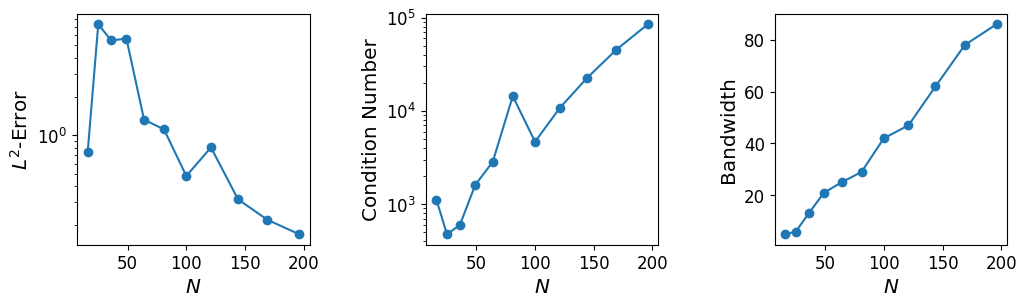

In [16]:
fig, axs = plt.subplots(1, 3, figsize=(12,3))

axs[0].set_xlabel(r"$N$")
axs[0].set_ylabel(r"$L^{2}$-Error")
axs[0].set_yscale('log')
axs[0].plot(Ns ** d, results[:, 0], 'o-')

axs[1].set_xlabel(r"$N$")
axs[1].set_ylabel(r"Condition Number")
axs[1].set_yscale('log')
axs[1].plot(Ns ** d, results[:, 1], 'o-')

axs[2].set_xlabel(r"$N$")
axs[2].set_ylabel(r"Bandwidth")
axs[2].plot(Ns ** d, results[:, 2], 'o-')

plt.subplots_adjust(wspace=0.5)
plt.savefig("figures/kansa/ns.pdf", bbox_inches='tight')

In [17]:
np.shape(results)[0]

11